In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.models import Sequential


from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np

import cv2

from sklearn.metrics import classification_report
from keras.models import load_model
import matplotlib.pyplot as plt

from keras.callbacks import CSVLogger
from keras import metrics
from keras import backend as K
from keras.layers.normalization import BatchNormalization

from tensorflow.python.framework import ops

from keras import regularizers

Using TensorFlow backend.


This model has a much deeper number of CNN layers

In [2]:
datasetAF = pd.read_csv("D:\\Dropbox\\utd\\cs courses\\cs 4375 machine learning\\assignments\\project\\rating csv data\\All_Ratings asian female csv.txt",header = 0)
avgPerFile = datasetAF['Rating'].groupby(datasetAF['Filename'],sort=False)
averagePerFileMean = avgPerFile.mean()
preparedAFDataset = pd.DataFrame({'Filename':averagePerFileMean.index, 'Avg Rating':averagePerFileMean.values})
labels = preparedAFDataset['Avg Rating']
labels.head(10)

0    2.333333
1    3.950000
2    3.183333
3    2.683333
4    2.000000
5    1.566667
6    2.566667
7    2.750000
8    2.150000
9    3.433333
Name: Avg Rating, dtype: float64

In [3]:
#needed to join path because windows
train_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/AF/AF/')
images = []
#adapted from https://www.quora.com/How-do-I-load-train-and-test-data-from-the-local-drive-for-a-deep-learning-Keras-model
#listdir returns a list containing the names of the entries in the directory given by path.
for sample in listdir(train_path):
    img_path = train_path + sample #sample is every file in the train directory
    x = cv2.imread(img_path) #loading file
    x = cv2.resize(x, (96, 96))
    # preprocessing if required
    images.append(x) #adding to x_train array
#scale all pixels to between 0 and 1
imagesNumPy = np.array(images, dtype="float") / 255.0


In [4]:
(trainX, testX, trainY, testY) = train_test_split(imagesNumPy, labels,test_size=0.30, random_state=42)

In [5]:
#run this model with Dense(notDefinedVariable) to see functions in tensorflow that are to be depreciated
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(1024, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#1 because it outputs only one rating
model.add(Dense(1))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Let's train the model using RMSprop
model.compile(loss=root_mean_squared_error,
              optimizer=opt,
              metrics=[metrics.mae])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
N = 38
csv_logger = CSVLogger(os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/callbacks RMSE Deep less epochs.log'), separator=',', append=False)
modelHistory = model.fit(trainX, trainY,
              batch_size=32,
              epochs=N,
              validation_data=(testX, testY),
              shuffle=True, callbacks=[csv_logger])

Train on 1400 samples, validate on 600 samples
Epoch 1/38
1400/1400 [==============================] - 15s 11ms/step - loss: 5.5219 - mean_absolute_error: 1.8201 - val_loss: 4.1937 - val_mean_absolute_error: 0.6950
Epoch 2/38
1400/1400 [==============================] - 7s 5ms/step - loss: 4.5842 - mean_absolute_error: 1.0089 - val_loss: 5.0957 - val_mean_absolute_error: 1.5745
Epoch 3/38
1400/1400 [==============================] - 7s 5ms/step - loss: 4.3148 - mean_absolute_error: 0.7932 - val_loss: 4.1502 - val_mean_absolute_error: 0.6798
Epoch 4/38
1400/1400 [==============================] - 7s 5ms/step - loss: 4.2828 - mean_absolute_error: 0.7803 - val_loss: 4.0601 - val_mean_absolute_error: 0.6170
Epoch 5/38
1400/1400 [==============================] - 6s 5ms/step - loss: 4.1821 - mean_absolute_error: 0.7195 - val_loss: 3.9969 - val_mean_absolute_error: 0.6030
Epoch 6/38
1400/1400 [==============================] - 7s 5ms/step - loss: 4.1048 - mean_absolute_error: 0.6846 - val_lo

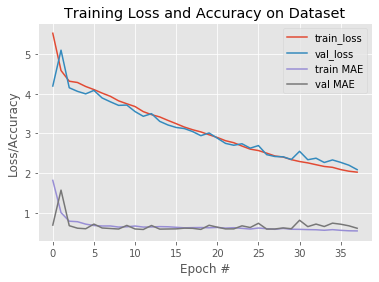

In [7]:
#N is the number of epochs
#plot code from https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), modelHistory.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), modelHistory.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), modelHistory.history["mean_absolute_error"], label="train MAE")
plt.plot(np.arange(0, N), modelHistory.history["val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [8]:
historyDF = pd.read_csv("C:\\Users\\alegAsus\\Downloads\\SCUT-FBP5500_v2.1\\SCUT-FBP5500_v2\\saved models\\continous RMSE\\callbacks RMSE Deep less epochs.log",header = 0)
historyDF.head(12)

,epoch,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,5.521854,1.820084,4.193670,0.694963
1,1,4.584161,1.008914,5.095741,1.574502
2,2,4.314758,0.793170,4.150228,0.679833
3,3,4.282846,0.780262,4.060053,0.617013
4,4,4.182116,0.719530,3.996900,0.602967
5,5,4.104839,0.684560,4.083657,0.720219
6,6,4.015797,0.672260,3.893381,0.622299
7,7,3.934822,0.673431,3.796961,0.609319
8,8,3.821405,0.645265,3.706899,0.596052
9,9,3.747223,0.652424,3.714970,0.687243


In [9]:
historyDF['val_mean_absolute_error'].mean()

0.6708215882067097

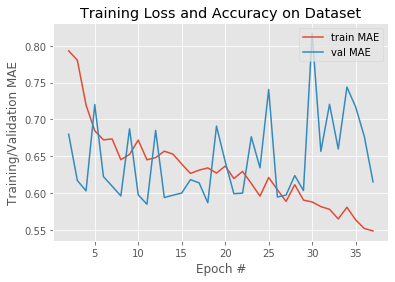

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(2, N), historyDF.loc[2:,"mean_absolute_error"], label="train MAE")
plt.plot(np.arange(2, N), historyDF.loc[2:,"val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Training/Validation MAE")
plt.legend(loc="upper right")

In [11]:
historyDF

,epoch,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,5.521854,1.820084,4.193670,0.694963
1,1,4.584161,1.008914,5.095741,1.574502
2,2,4.314758,0.793170,4.150228,0.679833
3,3,4.282846,0.780262,4.060053,0.617013
4,4,4.182116,0.719530,3.996900,0.602967
5,5,4.104839,0.684560,4.083657,0.720219
6,6,4.015797,0.672260,3.893381,0.622299
7,7,3.934822,0.673431,3.796961,0.609319
8,8,3.821405,0.645265,3.706899,0.596052
9,9,3.747223,0.652424,3.714970,0.687243
